# 75.06/95.58 Organización de Datos 
# Segundo Cuatrimestre de 2018

#  Trabajo Práctico 2

    

## Enunciado

El segundo trabajo práctico es una competencia de Machine Learning en donde cada grupo debe intentar determinar, para cada usuario presentado, cuál es la probabilidad de que ese usuario realice una conversión en Trocafone en un periodo determinado.

La competencia se desarrollará en la plataforma de Kaggle. En el siguiente link se provee la siguiente información para la competencia:
- https://drive.google.com/file/d/1kQujhvOKAU4EzhaYDbgquf_XKFt9sHMy/view?usp=sharing

En este podrán encontrar los siguientes archivos:

- events_up_to_01062018.csv
- labels_training_set.csv

El archivo **​events_up_to_01062018.csv** ​ contiene en el mismo formato utilizado en el TP1 información de eventos realizado en la plataforma para un conjunto de usuarios hasta el 31/05/2018.

Por otro lado el archivo **​labels_training_set.csv** ​indica para un subconjunto de los usuarios incluidos en el set de eventos **​events_up_to_01062018.csv** ​si los mismos realizaron una conversión (columna label = 1) o no (columna label = 0) desde el 01/06/2018 hasta el 15/06/2018.

La información de estos archivos debe ser utilizada para entrenar un modelo de Machine Learning, de tal forma de poder indicar la probabilidad de que conjunto seleccionado de usuarios realice una conversión desde el 01/06/2018 al 15/06/2018.

Se pedirá indicar esa probabilidad de conversión para usuarios que no se encuentran en el archivo "labels_training_set.csv", pero para los cuales se cuenta con información en **events_up_to_01062018.csv**

El listado de estas personas será provisto en el archivo **trocafone_kaggle_test.csv**

El link a la competencia es:
- https://www.kaggle.com/t/f477d6cc8ce34161a33bcc02ad055912

Los grupos deberán probar distintos algoritmos de Machine Learning para predecir cuál es la probabilidad de conversión del conjunto de usuarios seleccionados de Trocafone para la competencia en el periodo descrito. A medida que los grupos realicen pruebas deben realizar el correspondiente submit en Kaggle para evaluar el resultado de los mismos.

Al finalizar la competencia el grupo que mejor resultado tenga obtendrá 10 puntos para cada uno de sus integrantes que podrán ser usados en el examen por promoción o segundo recuperatorio.

Requisitos para la entrega del TP2:

- El TP debe ser programado en Python o R.
- Debe entregarse una carpeta con el informe de algoritmos probados, algoritmo final utilizado, transformaciones realizadas a los datos, feature engineering, etc.
- La entrega debe incluir también un link a github con el informe presentado en pdf, y todo el código.
- El grupo debe presentar el TP en una computadora en la fecha indicada por la cátedra, el TP debe correr en un lapso de tiempo razonable (inferior a 1 hora) y generar un submission válido que iguale el mejor resultado obtenido por el grupo en Kaggle.

El TP2 se va a evaluar en función del siguiente criterio:
- Cantidad de trabajo (esfuerzo) del grupo: ¿Probaron muchos algoritmos? 
- ¿Hicieron un buen trabajo de pre-procesamiento de los datos y feature engineering?
- Resultado obtenido en Kaggle (obviamente cuanto mejor resultado mejor nota)
- Presentación final del informe, calidad de la redacción, uso de información obtenida en el TP1, conclusiones presentadas.
- Performance de la solución final.



## Inicializacion de librerias

In [1]:
import locale
import pandas as pd
import matplotlib   #requerido para color map
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


#Tree Map
#import squarify

%matplotlib inline
plt.style.use('default')
#sns.set(style="whitegrid")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [2]:
# ---------------------------------------------------------------------------------
# Permite corregir el formato luego de aplicar un PIVOT
# ---------------------------------------------------------------------------------

def reset_index(df):
    '''Returns DataFrame with index as columns'''
    index_df = df.index.to_frame(index=False)
    df = df.reset_index(drop=True)
    return pd.merge(index_df, df, left_index=True, right_index=True)


## Cargo los datos

Especifico que ciertas columnas se carguen como categorias por temas de rendimiento

- **timestamp** : Fecha y hora cuando ocurrió el evento. (considerar BRT/ART).
- **event** : Tipo de evento
- **person** : Identificador de cliente que realizó el evento.
- **url** : Url visitada por el usuario.
- **sku** : Identificador de producto relacionado al evento.
- **model** : Nombre descriptivo del producto incluyendo marca y modelo.
- **condition** : Condición de venta del producto
- **storage** : Cantidad de almacenamiento del producto.
- **color** : Color del producto
- **skus** : Identificadores de productos visualizados en el evento.
- **search_term** : Términos de búsqueda utilizados en el evento.
- **staticpage** : Identificador de página estática visitada
- **campaign_source** : Origen de campaña, si el tráfico se originó de una campaña de marketing
- **search_engine** : Motor de búsqueda desde donde se originó el evento, si aplica.
- **channel** : Tipo de canal desde donde se originó el evento.
- **new_vs_returning** : Indicador de si el evento fue generado por un usuario nuevo (New) o por un usuario que previamente había visitado el sitio (Returning) según el motor de analytics.
- **city** : Ciudad desde donde se originó el evento
- **region** : Región desde donde se originó el evento.
- **country** : País desde donde se originó el evento.
- **device_type** : Tipo de dispositivo desde donde se genero el evento.
- **screen_resolution** : Resolución de pantalla que se está utilizando en el dispositivo desde donde se genero el evento.
- **operating_system_version** : Version de sistema operativo desde donde se origino el evento.
- **browser_version** : Versión del browser utilizado en el evento

In [3]:

# Corregir el PATH al archivo si hace falta
eventsFilePath = 'data/events_up_to_01062018.csv'


eventos = pd.read_csv(eventsFilePath,
                    parse_dates=['timestamp'],
                    dtype={'event':'category', 'city':'category', 'region':'category', 'country':'category', 
                           'condition':'category', 'storage':'category', 'color' : 'category','device_type':'category',
                           'campaign_source':'category', 'search_engine':'category', 'channel':'category', 
                           'new_vs_returning':'category', 'screen_resolution':'category',
                           'skus':'str','search_term':'str',
                           'url':'category', 'sku':'category', 'model': 'category', 'staticpage':'category', 
                           'operating_system_version':'category','browser_version':'category'},
                     na_values=['Unknown', 'Desconocido'],
#                     low_memory=False,
                    infer_datetime_format=True)




In [4]:
# ---------------------------------------------------------------------------------
# Visualizo algunos datos
# ---------------------------------------------------------------------------------
events = eventos
events.sample(3)


timestamp            event    person  url      sku                         model  condition storage      color skus search_term staticpage campaign_source search_engine channel new_vs_returning city region country device_type screen_resolution operating_system_version browser_version
1207359 2018-05-16 12:35:22   viewed product  d8ca1c88  NaN   8994.0                     iPhone 6S  Excelente    32GB  Ouro Rosa  NaN         NaN        NaN             NaN           NaN     NaN              NaN  NaN    NaN     NaN         NaN               NaN                      NaN             NaN
985085  2018-04-17 17:49:19  ad campaign hit  3cd434ec    /      NaN                           NaN        NaN     NaN        NaN  NaN         NaN        NaN          google           NaN     NaN              NaN  NaN    NaN     NaN         NaN               NaN                      NaN             NaN
6183    2018-05-19 16:51:43   viewed product  cd08ab61  NaN  10826.0  Samsung Galaxy J5 2016 Metal        Bom    16GB      Preto  NaN         NaN        NaN             NaN           NaN     NaN              NaN  NaN    NaN     NaN         NaN               NaN                      NaN             NaN

##  Training Data

In [5]:
labelsFilePath = 'data/labels_training_set.csv'
train_crudo = pd.read_csv(labelsFilePath,                    
                    dtype={'label':'int'},
                    low_memory=False)

train_crudo.head(1)

person  label
0  0566e9c1      0

### Visualizo cantidades y balanceo datos por Random Under-Sampling

In [6]:
original_conversion_frequency = train_crudo.groupby('label').count()
original_total_train = train_crudo.count()['person']
original_conversion = original_conversion_frequency.loc[1,:].values[0]
original_non_conversion = original_conversion_frequency.loc[0,:].values[0]
original_rate = original_conversion/original_total_train*100
#-------------------------------------------------
display('Total Observations',original_total_train)
display('Conversion', original_conversion)
display('Non conversion', original_non_conversion)
display('Conversions Rate (%)', original_rate)

'Total Observations'

19414

'Conversion'

980

'Non conversion'

18434

'Conversions Rate (%)'

5.047903574739879

##### Hago el balanceo
Método RUS: Tomo un sample de las no conversiones (PER = porcentaje del total mayoritario) y luego le agrego el total de las conversiones.

Ir probando con la constante PER: lo ideal es el ratio más alto con el menor dropeo de registros.

In [7]:
# Separo por label
conversions = train_crudo[train_crudo['label']==1]
non_conversions = train_crudo[train_crudo['label']==0]

# Ir probando con esta constante: lo ideal es el ratio más alto con el menor dropeo de registros.
PER = 7.25
cant_non_conv_undersampled = ((PER/100)*original_non_conversion).astype(int)
non_conv_undersampled = non_conversions.sample(cant_non_conv_undersampled)
# Agrego el total de las conversiones
frames = [non_conv_undersampled, conversions]
balanced_train = pd.concat(frames)
#-------------------------------------------------
balanced_conversion_frequency = balanced_train.groupby('label').count()
balanced_total_train = balanced_train.count()['person']
balanced_conversion = balanced_conversion_frequency.loc[1,:].values[0]
balanced_non_conversion = balanced_conversion_frequency.loc[0,:].values[0]
balanced_rate = balanced_conversion/balanced_total_train*100
#-------------------------------------------------
display('Total Observations',balanced_total_train)
display('Conversion', balanced_conversion)
display('Non conversion', balanced_non_conversion)
display('Conversions Rate (%)', balanced_rate)
display(f"Con el {PER} % tengo {cant_non_conv_undersampled} no conversiones y un ratio del {balanced_rate}.")
balanced_train.sample(5)

'Total Observations'

2316

'Conversion'

980

'Non conversion'

1336

'Conversions Rate (%)'

42.31433506044905

'Con el 7.25 % tengo 1336 no conversiones y un ratio del 42.31433506044905.'

person  label
16669  ba5fd3d5      1
16741  cd843a85      0
14170  3daa14cb      0
16462  d6db0770      1
8747   e4d92007      0

## Retomo eventos para la ingeniería de features

In [8]:
# ---------------------------------------------------------------------------------
# Analisis de valores distintos para determinar valores categoricos
# ---------------------------------------------------------------------------------
#events.condition.value_counts() # Estado del celular
#events.storage.value_counts()  # Almacenamiento (Memoria)
#events.color.value_counts() # Color del celular
#events.device_type.value_counts() # Tipo de dispositivo a la venta
#events.screen_resolution.value_counts() # Resolucion de pantalla
#events.operating_system_version.value_counts() # Sistema operativo del equipo
#events.browser_version.value_counts() # Navegador usado por el cliente
#events.campaign_source.value_counts() # Campaña de origen 
#events.search_engine.value_counts() # Search Engine de origen
#events.search_term.value_counts() # Texto buscado en el Search 
#events.channel.value_counts() # Canal que origina el evento
#events.new_vs_returning.value_counts()
#events.url.value_counts()
#events.sku.value_counts()
events.staticpage.value_counts()
#events.model.value_counts()
#events.event.value_counts()


CustomerService                      5239
FaqEcommerce                         1317
AboutUs                              1217
Quiosks                               868
trust-trocafone                       632
TermsAndConditionsReturnEcommerce     528
galaxy-s8                             380
Conditions                            285
how-to-sell                           234
how-to-buy                            232
TermsAndConditionsEcommerce           119
club-trocafone                        107
PrivacyEcommerce                       28
black_friday                           15
Name: staticpage, dtype: int64

## Featured Extraction

El objetivo de esta etapa es agregar las columnas que poreciso para hacer más facil el proceso de análisis.

### Nuevos Features

**Agreguen sus ideas !!! **.

Despues vemos si podemos agregar el codigo para obtenerlo

#### Relacionados al timestamp de la visita

- [x] Numero de dia de la semana (1-7) 
- [x] Numero de dia del mes (1-31)
- [x] Numero de dia del año (1-365)
- [x] Hora (0-23)
- [ ] Fecha de alta como nuevo usuario


#### Relacionados al producto

- [x] Marca
- [x] Modelo
- [x] Cantidad de marcas visualizadas

#### Otros

- [ ] Referrer de la primera visita
- [ ] Referrers
- [x] dia del año ultima conversion
- [x] dias sin convertir
- [X] Cantidad de dias activo
- [X] Cantidad de eventos por tipo
- [ ] Cantidad de paginas visitadas en la sesion (ver como analizar sesiones)
- [X] Duracion minima de una sesion
- [X] Duracion maxima de una sesion
- [X] Duracion promedio de las sesiones
- [X] Cantidad de sesiones
- [ ] Cantidad de compras anteriores en los ultimos 15/30/60/90/120 dias 
- [X] Fecha de la ultima/media/primera conversion de 2018
- [ ] Cantidad de modelos distintos visualizados
- [x] Cantidad de accesos por canales 
- [x] Pais
- [x] Condicion (estado del producto)
- [x] Dispositivo usado
- [x] Campaña
- [x] Números arrojados al hacer cálculos con el SKU, como nocion de tiempo que lleva online el producto.




### Propiedades relacionadas al momento del evento

In [9]:
# ---------------------------------------------------------------------------------
# Completa el dataset con los las propiedades relacionadas a la fecha y hora
# ---------------------------------------------------------------------------------
# Numero de dia en el mes
events['dia_mes'] = events.timestamp.dt.day

# Numero de dia de la semana
events['dia_semana'] = events.timestamp.dt.dayofweek 

# Numero de dia del año (sirve para hacer diferencia de dias)
events['dia_anio'] = events.timestamp.dt.dayofyear

# Numero de mes
events['mes'] = events.timestamp.dt.month

# Hora
events['hora'] = events.timestamp.dt.hour

# Numero de semana 
events['semana'] = events.timestamp.dt.week


In [10]:
persona_dia_semana = events.pivot_table(index='person',columns='dia_semana', values='timestamp', aggfunc='count', fill_value=0).fillna(0).astype(int)
persona_dia_semana.columns = ['dia_semana_' +  str(col).replace(' ','_') for col in persona_dia_semana.columns]
persona_dia_semana = persona_dia_semana.reset_index()
# display(persona_dia_semana.head(5))

persona_dia_mes = events.pivot_table(index='person',columns='dia_mes', values='timestamp', aggfunc='count', fill_value=0).fillna(0).astype(int)
persona_dia_mes.columns = ['dia_mes_' +  str(col).replace(' ','_') for col in persona_dia_mes.columns]
persona_dia_mes = persona_dia_mes.reset_index()
# display(persona_dia_mes.head(5))

persona_hora = events.pivot_table(index='person',columns='hora', values='timestamp', aggfunc='count', fill_value=0).fillna(0).astype(int)
persona_hora.columns = ['hora_' +  str(col).replace(' ','_') for col in persona_hora.columns]
persona_hora = persona_hora.reset_index()
# display(persona_hora.head(5))

timestamp_attrs = pd.merge(persona_dia_semana, persona_dia_mes, how='outer', on=['person'])
timestamp_attrs = pd.merge(timestamp_attrs, persona_hora, how='outer', on=['person'])

timestamp_attrs.sample()

person  dia_semana_0  dia_semana_1  dia_semana_2  dia_semana_3  dia_semana_4  dia_semana_5  dia_semana_6  dia_mes_1  dia_mes_2  dia_mes_3  dia_mes_4  dia_mes_5  dia_mes_6  dia_mes_7  dia_mes_8  dia_mes_9  dia_mes_10  dia_mes_11  dia_mes_12  dia_mes_13  dia_mes_14  dia_mes_15  dia_mes_16  dia_mes_17  dia_mes_18  dia_mes_19  dia_mes_20  dia_mes_21  dia_mes_22  dia_mes_23  dia_mes_24  dia_mes_25  dia_mes_26  dia_mes_27  dia_mes_28  dia_mes_29  dia_mes_30  dia_mes_31  hora_0  hora_1  hora_2  hora_3  hora_4  hora_5  hora_6  hora_7  hora_8  hora_9  hora_10  hora_11  hora_12  hora_13  hora_14  hora_15  hora_16  hora_17  hora_18  hora_19  hora_20  hora_21  hora_22  hora_23
21050  8bc2c645             0             0             7             0             0             0             0          0          0          0          0          0          0          0          0          0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           7           0       0       0       7       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0

### Separa marca y modelo

In [11]:
# ---------------------------------------------------------------------------------
#  Determina Marca y modelo y lo agrega como columnas
# ---------------------------------------------------------------------------------

def getModelo(marcaModelo):
    if (marcaModelo == marcaModelo):
        x=marcaModelo.split()
        return ' '.join(x[1:])
    return marcaModelo

# agrega columnas de marca y modelo
events['marca'] = events.model.str.split().str.get(0).astype('category')
events['modelo'] = events.model.apply(lambda x: getModelo(str(x))).astype('category') 
events['es_modelo_premium'] = events.model.str.split().str.get(-1).isin(['Prime','Plus','+', 'Z', 'Edge', 'Duos', 'Dual']).astype('int64')

# Elimina la columna model (solo hacerlo al finalde las pruebas por las dudas)
#events.drop(['model'], axis=1 , inplace=True)

events[['model','marca', 'modelo', 'es_modelo_premium' ]].head(1)


model    marca           modelo  es_modelo_premium
0  Samsung Galaxy J7 Prime  Samsung  Galaxy J7 Prime                  1

### MARCAS

Marcas visualizadas
Cantidad de marcas visualizada por la persona

In [12]:
persona_marca = events[(events.event=='viewed product')].pivot_table(index='person',columns='marca', values='timestamp', aggfunc='count', fill_value=0).fillna(0).astype(int)
persona_marca.columns = ['marca_' +  col.replace(' ','_') for col in persona_marca.columns]
persona_marca = persona_marca.reset_index()

persona_marca.columns

Index(['person', 'marca_Asus', 'marca_LG', 'marca_Lenovo', 'marca_Motorola', 'marca_Outros', 'marca_Quantum', 'marca_Samsung', 'marca_Sony', 'marca_Xiaomi', 'marca_iPad', 'marca_iPhone'], dtype='object')

In [13]:
#Cantidad de visualizaciones de producto por marca para cada persona
persona_m = events[(events.event=='viewed product')].groupby(['person','marca']).size().to_frame('marca_cant').reset_index().drop('marca_cant', axis=1)
persona_m = persona_m.groupby(['person']).size().to_frame('cant_marcas_vistas').reset_index()

In [14]:
#Junta los dos df
persona_marca = pd.merge(persona_marca, persona_m, how='outer', on=['person'])
persona_marca.head()

person  marca_Asus  marca_LG  marca_Lenovo  marca_Motorola  marca_Outros  marca_Quantum  marca_Samsung  marca_Sony  marca_Xiaomi  marca_iPad  marca_iPhone  cant_marcas_vistas
0  00091926           0         2             1              55             0              0             61           1             0           1           251                   7
1  00091a7a           0         0             0               0             0              0              0           0             0           0             3                   1
2  000ba417           0         4             0              35             0              0            105           1             0           0             8                   5
3  000c79fe           0         0             0               0             0              0              0           0             0           0             3                   1
4  000e4d9e           0         1             0               2             0              0            300          15             0           0            21                   5


### MODELOS

In [15]:
# persona_modelo = (events.set_index('person')['modelo']
#         .str.split(expand=True)
#         .stack()
#         .reset_index(level=1, drop=True)
#         .reset_index(name='modelo')
#         .drop_duplicates()
#        )
# persona_modelo = pd.concat([persona_modelo,pd.get_dummies(persona_modelo['modelo'], prefix='mod')],axis=1)

In [16]:
# persona_modelo = persona_modelo.drop('modelo', axis=1)

In [17]:
# persona_modelo = persona_modelo.groupby('person').sum()
# persona_modelo.sample()

### Es modelo premium?

True para 'plus', 'edition', 'edge', etc


In [18]:
es_premium = events.groupby('person')[['es_modelo_premium']].sum().reset_index()

persona_marca = pd.merge(persona_marca, es_premium, how='outer', on=['person'])
# persona_marca.head()

#### SKUS como nocion de ingreso a stock
Creo una col con SKU categ ordenada, intentando un approach por tiempo de ingreso a stock del modelo (menor ID, más tiempo en la web, más viejo el teléfono).

In [19]:
# categ ordered falla por bug. lo hago con floats (sku_num).

# genero sku uniques ordenados para el ordenamiento de categoría
events['sku_num'] = events['sku'].astype('float32')# Traigo de eventos sku y persona
persona_skunum_grouped = events.groupby('person')[['sku_num']]

# Tiro un describe para ver qué hay:
# persona_skunum_grouped.describe()

In [20]:
sku_diffs = persona_skunum_grouped.nunique().rename(index=str,columns={'sku_num':'sku_diffs'}).reset_index()
sku_diffs.head(3)

person  sku_diffs
0  0008ed71          3
1  00091926        164
2  00091a7a          3

In [21]:
sku_mean = persona_skunum_grouped.mean().rename(index=str,columns={'sku_num':'sku_mean'}).reset_index()
sku_mean.head(3)

person     sku_mean
0  0008ed71  6374.666504
1  00091926  7190.058594
2  00091a7a  5487.666504

In [22]:
sku_max = persona_skunum_grouped.max().rename(index=str,columns={'sku_num':'sku_max'}).reset_index()
sku_max.head(3)

person  sku_max
0  0008ed71   8247.0
1  00091926  15819.0
2  00091a7a   8261.0

In [23]:
sku_min = persona_skunum_grouped.min().rename(index=str,columns={'sku_num':'sku_min'}).reset_index()
sku_min.head(3)

person  sku_min
0  0008ed71   3372.0
1  00091926   1365.0
2  00091a7a   1357.0

In [24]:
sku_std = persona_skunum_grouped.std().rename(index=str,columns={'sku_num':'sku_std'}).reset_index()
sku_std.head(3)

person      sku_std
0  0008ed71  2626.717773
1  00091926  2983.039795
2  00091a7a  3646.651855

In [25]:
sku_median = persona_skunum_grouped.median().rename(index=str,columns={'sku_num':'sku_median'}).reset_index()
sku_median.head(3)

person  sku_median
0  0008ed71      7505.0
1  00091926      7013.5
2  00091a7a      6845.0

In [26]:
sku_var = persona_skunum_grouped.var().rename(index=str,columns={'sku_num':'sku_var'}).reset_index()
sku_var.head(3)

person     sku_var
0  0008ed71   6899646.5
1  00091926   8898526.0
2  00091a7a  13298069.0

In [27]:
sku_numbers = pd.merge(sku_var, sku_median, how='outer', on=['person'])
sku_numbers = pd.merge(sku_numbers, sku_std, how='outer', on=['person'])
sku_numbers = pd.merge(sku_numbers, sku_min, how='outer', on=['person'])
sku_numbers = pd.merge(sku_numbers, sku_max, how='outer', on=['person'])
sku_numbers = pd.merge(sku_numbers, sku_mean, how='outer', on=['person'])
sku_numbers = pd.merge(sku_numbers, sku_diffs, how='outer', on=['person'])
                       
sku_numbers.head()

person     sku_var  sku_median      sku_std  sku_min  sku_max     sku_mean  sku_diffs
0  0008ed71   6899646.5      7505.0  2626.717773   3372.0   8247.0  6374.666504          3
1  00091926   8898526.0      7013.5  2983.039795   1365.0  15819.0  7190.058594        164
2  00091a7a  13298069.0      6845.0  3646.651855   1357.0   8261.0  5487.666504          3
3  000ba417  13395084.0      5459.0  3659.929443    220.0  15759.0  6559.893555         81
4  000c79fe         0.0      9944.0     0.000000   9944.0   9944.0  9944.000000          1

### Tipo de evento

In [28]:
# events_person_all    = events.pivot_table(index='person',columns='event', values='timestamp', aggfunc='count').fillna(0).astype(int)
#events_person_15     = events[events.timestamp >= '2018-05-15'].pivot_table(index='person',columns='event', values='timestamp', aggfunc='count').fillna(0).astype(int)
#events_person_15_30  = events[(events.timestamp >= '2018-05-01') & (events.timestamp < '2018-05-16')] #.pivot_table(index='person',columns='event', values='timestamp', aggfunc='count').fillna(0).astype(int)
#events_person_30     = events[events.timestamp >= '2018-05-01'].pivot_table(index='person',columns='event', values='timestamp', aggfunc='count').fillna(0).astype(int)
#events_person_60     = events[events.timestamp >= '2018-04-01'].pivot_table(index='person',columns='event', values='timestamp', aggfunc='count').fillna(0).astype(int)
#events_person_90     = events[events.timestamp >= '2018-03-01'].pivot_table(index='person',columns='event', values='timestamp', aggfunc='count').fillna(0).astype(int)


# events_person_all.sort_values(by=['conversion' , 'staticpage' ], ascending=[False, False]).head(50)
# persona_eventos = reset_index(events_person_all)




In [29]:
#persona_eventos.count()
#persona_eventos.head(5)

### Dias activo

In [30]:
# Dias activo
#---------------------------------------
dias_activo = events.groupby('person').dia_anio.nunique().to_frame(name='dias_activo').reset_index() #.set_index('person')
dias_activo.head(3)

person  dias_activo
0  0008ed71            1
1  00091926           22
2  00091a7a            1

### Condicion del equipo

In [31]:
# Condition 
#---------------------------------------
# pd.get_dummies(events.reset_index().set_index('person')['condition'])  #[events.condition.notnull()]

# persona_condicion = reset_index(
#     events.groupby(['person','condition']).size().to_frame(name='condicion_cant').reset_index()\
#     .pivot_table(index='person',columns='condition', values='condicion_cant', aggfunc='sum').fillna(0).astype(int)
# ).rename(index=str,columns={"Bom": "cond_bien", "Bom - Sem Touch ID": "cond_bien_sin_touchId", "Excelente": "cond_Excelente", "Muito Bom": "cond_muy_bien", "Novo": "cond_nuevo"})    

#persona_condicion.head(3)

### Pais

In [32]:
# Cantidad minima de personas para considerar el pais sino engloba por 'Otros'
cantidad_min_por_pais = 10

paises_personas_tmp = events.groupby(['person','country']).size().to_frame(name='country_cant').reset_index().drop('country_cant', axis=1)
#display(paises_personas_tmp.head(3))

# Cambia Country por pais agrupando en 'Otros' los muy chiquitos
paises = paises_personas_tmp.groupby(['country']).size().to_frame(name='person_cant').reset_index().sort_values('person_cant', ascending=False).reset_index()
paises = paises.drop(['index'], axis=1)
paises['pais'] = paises.apply(lambda r: r['country'] if r['person_cant'] >= cantidad_min_por_pais else 'Otros', axis=1)
paises = paises.drop(['person_cant'], axis=1)
# Corrige nombres de paises especificos
paises.loc[paises.pais == 'Unknown', 'pais'] = 'Desconocido'
paises.loc[paises.pais == 'United Kingdom', 'pais'] = 'UK'
paises.loc[paises.pais == 'United States', 'pais'] = 'USA'

# Genera la tabla de personas paises donde cada persona aparece una sola vez
paises_personas_tmp = paises_personas_tmp.drop_duplicates()
persona_pais = pd.merge(paises_personas_tmp, paises, how='inner', on=['country']).drop('country', axis=1).drop_duplicates()
persona_pais = pd.concat([persona_pais,pd.get_dummies(persona_pais['pais'], prefix='pais')],axis=1).drop('pais', axis=1).groupby('person').sum().reset_index()
# persona_pais.head()

#### Algunos analisis sobre datos de paises


In [33]:
# Hay 1200 personas que no son de brasil

#pais_resumen[(pais_resumen.Brazil == 0) & \
#             (pais_resumen.Unknown ==0) &\
#             ((pais_resumen['United States'] ==0))]

In [34]:
#---------------------------------------
# country -  Person que figuran en mas 
# de un pais
#---------------------------------------

#events.groupby(['person','country']).size().to_frame(name='country_cant')\
#    .groupby(['person']).filter(lambda g: len(g) > 1).groupby(['person']).size().to_frame(name='country_cant')\
#    .sort_values('country_cant',ascending=False)


### Dispositivo (Device_type)

In [35]:
# device_type
#---------------------------------------

persona_device = events.groupby(['person','device_type']).size().to_frame('device_type_cant').reset_index().drop('device_type_cant', axis=1)
persona_device = pd.concat([persona_device,pd.get_dummies(persona_device['device_type'], prefix='dispo')],axis=1).drop('device_type', axis=1).groupby('person').sum().reset_index()
# persona_device.head(5)




### Canal

Cantidad de acceso por cada canal

In [36]:

# Cantidad de acceso por cada canal
#---------------------------------------

persona_canal = events.groupby(['person','channel']).size().to_frame('channel_cant').reset_index()\
    .pivot_table(index='person',columns='channel', values='channel_cant', aggfunc='sum').fillna(0).astype(int)   
persona_canal.columns = ['canal_' +  col for col in persona_canal.columns]
persona_canal = persona_canal.reset_index()
# persona_canal.head(5)
 

###  Campaña de origen 

In [37]:
persona_campania = events.groupby(['person','campaign_source']).size().to_frame('campania_cant').reset_index()\
    .pivot_table(index='person',columns='campaign_source', values='campania_cant', aggfunc='sum').fillna(0).astype(int)   
persona_campania.columns = ['campania_' +  col.replace(' ','_') for col in persona_campania.columns]

persona_campania = persona_campania.reset_index()
# persona_campania.head()


### Static Page

In [38]:
"""
CustomerService                      5239
FaqEcommerce                         1317
AboutUs                              1217
Quiosks                               868
trust-trocafone                       632
TermsAndConditionsReturnEcommerce     528
galaxy-s8                             380
Conditions                            285
how-to-sell                           234
how-to-buy                            232
TermsAndConditionsEcommerce           119
club-trocafone                        107
PrivacyEcommerce                       28
black_friday                           15
"""
persona_staticpage = events.groupby(['person','staticpage']).size().to_frame('staticpage_cant').reset_index()\
    .pivot_table(index='person',columns='staticpage', values='staticpage_cant', aggfunc='sum').fillna(0).astype(int)
    
persona_staticpage.columns = ['staticpage_' +  col.replace(' ','_') for col in persona_staticpage.columns]
persona_staticpage = persona_staticpage.reset_index()

persona_staticpage.head(1)

person  staticpage_AboutUs  staticpage_Conditions  staticpage_CustomerService  staticpage_FaqEcommerce  staticpage_PrivacyEcommerce  staticpage_Quiosks  staticpage_TermsAndConditionsEcommerce  staticpage_TermsAndConditionsReturnEcommerce  staticpage_black_friday  staticpage_club-trocafone  staticpage_galaxy-s8  staticpage_how-to-buy  staticpage_how-to-sell  staticpage_trust-trocafone
0  0027574e                   0                      1                           0                        0                            0                   0                                       0                                             0                        0                          0                     0                      0                       0                           0

### Indicadores de sesiones

In [39]:
#----------------------------------------------------- 
# Calculo de indicadores de sesiones
#----------------------------------------------------- 

# Plazo maximo en minutos para considerar dos eventos consecutivos que pertenecen a la misma sesion
plazolapsoMismaSesion = 30

#Ordena los registros
sesiones = events[['person','timestamp']].sort_values(by=['person','timestamp'],ascending=[True,True])

#Calcula el lapso transcurrido con el evento anterior
sesiones['lapso'] = sesiones['timestamp'].diff().dt.total_seconds()/60.0

#Si cambia de persona no calcula lapso
sesiones.loc[sesiones.person != sesiones.person.shift(), 'lapso'] = None

# Si supera el lapso maximo es una nueva sesion no calcula lapso
sesiones.loc[sesiones.lapso > plazolapsoMismaSesion, 'lapso'] = None

# Auxiliares Booleanos para calcular la duracion de las sesiones
# Estoy en la misma sesion si no supero al plazo maximo entre eventos (los NaN tampoco son de la misma sesion)
sesiones['misma_sesion'] = sesiones['lapso'] < plazolapsoMismaSesion

# El negado del anterior indica donde empieza la sesion
sesiones['inicio_sesion'] = ~sesiones.misma_sesion 

# Un registro antes del fin de sesion indica donde termina la sesion anterior por lo que 
# dezplaza el inicio de sesion un lugar para atras
sesiones['fin_sesion'] = sesiones.inicio_sesion
sesiones.fin_sesion = sesiones.fin_sesion.shift(-1).fillna(True)

# Auxiliar para contabilizar las sesiones. 
sesiones['aux_sesion'] = 0

# Pone 1 a todos los auxiliares con inicios de sesion
sesiones.loc[sesiones.inicio_sesion, 'aux_sesion'] = 1

# Numera todas las sesiones usando corte de control y la funcion de suma acumulada
sesiones['nume_sesion'] = sesiones.groupby(['person'])['aux_sesion'].apply(lambda x: x.cumsum())

# Obtiene la tabla resumida de sesiones por cada person 
# Acumula los lapsos entre eventos de cada sesion
sesiones_resumen = sesiones.groupby(['person','nume_sesion']).agg({'lapso': np.sum }).reset_index()

# Calcula las duraciones minima, maxima y total de la duracion de las sesiones y la cantidad de sesiones
sesiones_resumen = sesiones_resumen.groupby(['person']).agg({'lapso': [np.min,np.max,np.sum], 'nume_sesion' : np.size }).reset_index()

# Cambia nombre a las columnas
sesiones_resumen.columns = ['person', 'sesion_minutos_min', 'sesion_minutos_max','sesion_minutos_sum','sesion_cant' ] 

#Agrega duracion Promedio sesion
sesiones_resumen['sesion_minutos_avg'] = sesiones_resumen.sesion_minutos_sum / sesiones_resumen.sesion_cant

sesiones_resumen.head(3)



#'-- Esto es para que no me llene la pantalla --'


person  sesion_minutos_min  sesion_minutos_max  sesion_minutos_sum  sesion_cant  sesion_minutos_avg
0  0008ed71            0.016667            6.716667            6.733333            3            2.244444
1  00091926            0.000000           35.483333          248.166667           34            7.299020
2  00091a7a            5.783333            5.783333            5.783333            1            5.783333

### Eventos Importantes

#### Dia de la ultima conversion previas al 2018-06-01
#### Dia de la ultima visualizacion de producto
#### Ultimo visualizacion de producto

In [40]:
#Fecha de la ultima conversion conocida
import datetime
dia20180601 = datetime.date(2018,6,1).timetuple().tm_yday

# desde ultima conversion
persona_conversiones_last = events[events.event=='conversion'].groupby(['person'])['dia_anio'].max().to_frame(name='dia_ult_conver').reset_index()
persona_conversiones_last['dias_sin_convertir'] = dia20180601 - persona_conversiones_last.dia_ult_conver

# desde primera conversion
persona_conversiones_1st = events[events.event=='conversion'].groupby(['person'])['dia_anio'].min().to_frame(name='dia_1raConv2018').reset_index()
persona_conversiones_1st['dias_desde_1eraConv2018'] = dia20180601 - persona_conversiones_1st.dia_1raConv2018

persona_conversiones = pd.merge(persona_conversiones_1st, persona_conversiones_last, how='outer', on=['person'])

# convirtieron solo un día
persona_conversiones['convirtio_un_solo_dia'] = (persona_conversiones['dia_ult_conver'] == persona_conversiones['dia_1raConv2018']).astype('int64')

persona_conversiones_median = events[events.event=='conversion'].groupby(['person'])['dia_anio'].median().to_frame(name='dia_mid_conver').reset_index()
persona_conversiones_median['dias_desde_medianConv2018'] = dia20180601 - persona_conversiones_median.dia_mid_conver

fechas_conversiones = pd.merge(persona_conversiones, persona_conversiones_median, how='outer', on=['person'])

# persona_conversiones.withColumn("d", col("b") === col("c"))
fechas_conversiones.head()


person  dia_1raConv2018  dias_desde_1eraConv2018  dia_ult_conver  dias_sin_convertir  convirtio_un_solo_dia  dia_mid_conver  dias_desde_medianConv2018
0  000ba417              146                        6             146                   6                      1           146.0                        6.0
1  001001be              136                       16             136                  16                      1           136.0                       16.0
2  001804a2              145                        7             145                   7                      1           145.0                        7.0
3  0019e639               40                      112             142                  10                      0            91.0                       61.0
4  001b0bf9              142                       10             142                  10                      1           142.0                       10.0

In [41]:
# Ultimo visualizacion de producto

# Referer primera visita

# persona_eventos['ult_vis_producto'] = events[(events.event =='viewed product' )].groupby('person')['dia_anio'].max()



## Armado del Dataset

In [42]:
#Inicializa el dataframe de personas
personas = events.person.drop_duplicates().to_frame()
# personas.fillna(value=9999,inplace=True) ?????

personas = pd.merge(personas, timestamp_attrs,   on='person', how='outer')
personas = pd.merge(personas, fechas_conversiones,   on='person', how='outer')
personas = pd.merge(personas, dias_activo,         on='person', how='outer')
personas = pd.merge(personas, sku_numbers,         on='person', how='outer')
personas = pd.merge(personas, persona_marca,       on='person', how='outer')  
personas = pd.merge(personas, sesiones_resumen,    on='person', how='outer')
personas = pd.merge(personas, persona_campania,    on='person', how='outer')
personas = pd.merge(personas, persona_canal,       on='person', how='outer')
# personas = pd.merge(personas, persona_condicion,   on='person', how='outer')
# personas = pd.merge(personas, persona_pais,        on='person', how='outer')  

# personas = pd.merge(personas, persona_modelo,      on='person', how='outer')  
personas = pd.merge(personas, persona_device,      on='person', how='outer')
# personas = pd.merge(personas, persona_eventos,     on='person', how='outer')
personas = pd.merge(personas, persona_staticpage,  on='person', how='outer')



personas.columns.nunique(),personas.columns

#personas = pd.merge(personas, labels,              on='person', how='inner')


# GRaba el CSV de salida
#personas.to_csv('data\personas_resumen.csv')
#personas.count()


(142,
 Index(['person', 'dia_semana_0', 'dia_semana_1', 'dia_semana_2', 'dia_semana_3', 'dia_semana_4', 'dia_semana_5', 'dia_semana_6', 'dia_mes_1', 'dia_mes_2',
        ...
        'staticpage_PrivacyEcommerce', 'staticpage_Quiosks', 'staticpage_TermsAndConditionsEcommerce', 'staticpage_TermsAndConditionsReturnEcommerce', 'staticpage_black_friday', 'staticpage_club-trocafone', 'staticpage_galaxy-s8', 'staticpage_how-to-buy', 'staticpage_how-to-sell', 'staticpage_trust-trocafone'], dtype='object', length=142))

In [43]:
# personas.count() #-----> las diferentes son porque solo toma las conversiones o eventos determinados y no todos ellos.
# personas.dtypes

# Importante

El dataset tiene la etiqueta a predecir en la segunda columna por comodidad

A mi me tarda unos minutos en generar este nuevo Dataset.
Me quedan un par de features por generar pero pensaba empezar por esto.



## Armo datasets para la ejecución

In [44]:
from sklearn.model_selection import train_test_split

personas_train = pd.merge(personas, balanced_train,    on='person', how='inner')
personas_train.fillna(value=0,inplace=True)

# Hace un split de los dataset de entrenamiento y evaluacion
X, y = personas_train.iloc[:,1:-1],personas_train.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4  )   #, random_state=123



# Gradient boost

0.6666666666666666

c:\program files (x86)\python36-32\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


(array([0.       , 0.3171521, 1.       ]),
 array([nan, nan, nan]),
 array([2, 1, 0]))

[Text(0,0.5,'no conv'), Text(0,1.5,'conversion')]

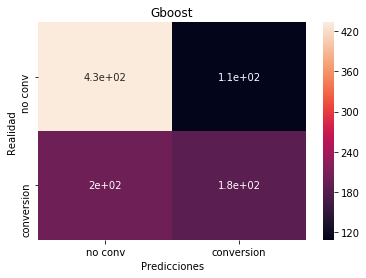

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

gbc = GradientBoostingClassifier()#n_estimators=)
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

display(gbc.score(X_test, y_test))

display(metrics.roc_curve(y_test, y_pred, pos_label=2))

from sklearn.metrics import confusion_matrix
cm_gbc = confusion_matrix(y_test, y_pred)

list1 = ["Real 0", "Real 1"]
list2 = ["Pred 0", "Pred 1"]
pd.DataFrame(cm_gbc, list1,list2)

ax= plt.subplot()
sns.heatmap(cm_gbc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicciones')
ax.set_ylabel('Realidad') 
ax.set_title('Gboost')
ax.xaxis.set_ticklabels(['no conv', 'conversion'])
ax.yaxis.set_ticklabels(['no conv', 'conversion'])

# Logistic regression

0.6407766990291263

[Text(0,0.5,'no conv'), Text(0,1.5,'conversion')]

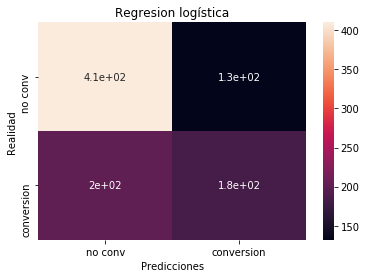

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

logreg = LogisticRegression(
C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred)

list1 = ["Real 0", "Real 1"]
list2 = ["Pred 0", "Pred 1"]
pd.DataFrame(cm_lr, list1,list2)

ax= plt.subplot()
sns.heatmap(cm_lr, annot=True, ax = ax) # annot=True to annotate cells
display(logreg.score(X_test, y_test))
# labels, title and ticks
ax.set_xlabel('Predicciones')
ax.set_ylabel('Realidad') 
ax.set_title('Regresion logística')
ax.xaxis.set_ticklabels(['no conv', 'conversion'])
ax.yaxis.set_ticklabels(['no conv', 'conversion'])

In [47]:
# Graba el modelo si hace falta

import time
filename = time.strftime("data/XGBOOST_%Y%m%d_%H%M%S_resguardo.model")
bst.save_model(filename)


NameError: name 'bst' is not defined

## Evaluacion y generacion de archivos para el submit

In [ ]:
#---------------------------------------------------
# Genera lo que se va a submitir
#---------------------------------------------------

# Carga el archivo de evaluacion
test_filename = 'data/trocafone_kaggle_test.csv'
test_labels = pd.read_csv(test_filename, dtype={'label':'float32'},low_memory=False)


submitnumber = '008'

# Arma el achivo de prueba
personas_test = pd.merge(personas, test_labels, on='person', how='inner')
personas_test.fillna(value=0,inplace=True)
DMatriz_pred = xgb.DMatrix(personas_test.iloc[:,1:])


# Genera la prediccion

prediccion = bst.predict(DMatriz_pred)
personas_test['label'] = prediccion 
resultado = personas_test[['person','label']]
resultado = resultado.set_index('person')
#display(resultado.head(3))

#---------------------------------------------------
# GRaba el CSV de salida y el modelo
#---------------------------------------------------

import time

# Arma nombres de los archivos
filename = time.strftime("data/GradBOOST_%Y%m%d_%H%M%S_SUBMIT_")
filename = filename + submitnumber 

# Graba el modelo
bst.save_model(filename + ".model")
# Graba el el submit que se va a predecir
resultado.to_csv(filename + ".csv")



